In [1]:
#首先定义两个函数
#极差标准化函数
st_range <- function(x) { 
  return((x - min(x)) / (max(x) - min(x)))
}

In [2]:
#绘制ROC曲线函数
ROC <- function() { 
  library(ROCR)
  pred_nnet_Tr <- prediction(train_pred, train$y)
  perf_nnet_Tr <- performance(pred_nnet_Tr,"tpr","fpr")
  
  pred_nnet_Te <- prediction(test_pred, test$y)
  perf_nnet_Te <- performance(pred_nnet_Te,"tpr","fpr")
  
  plot(perf_nnet_Tr,col='green',main="ROC of Models")
  plot(perf_nnet_Te, col='black',lty=2,add=TRUE);
  abline(0,1,lty=2,col='red')
  
  
  lr_m_auc<-round(as.numeric(performance(pred_nnet_Tr,'auc')@y.values),3)
  lr_m_str<-paste("Tran-AUC:",lr_m_auc,sep="")
  legend(0.3,0.45,c(lr_m_str),2:8)
  
  lr_m_auc<-round(as.numeric(performance(pred_nnet_Te,'auc')@y.values),3)
  lr_m_ste<-paste("Test-AUC:",lr_m_auc,sep="")
  legend(0.3,0.25,c(lr_m_ste),2:8)
}

In [3]:
#读取german数据
#该数据从german_data数据改写，将编码转换为数值
#german.data是经过脱敏的数据，因此从变量中完全看不出变量的意义，仅知道这些变量是连续变量分箱后的顺序值

#导入数据和数据清洗
data<-read.csv("data/GERMAN.csv")
data[data$y==1,'y']=0
data[data$y==2,'y']=1

head(data)

x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,⋯,x16,x17,x18,x19,x20,x21,x22,x23,x24,y
1,6,4,12,5,5,3,4,1,67,⋯,0,0,1,0,0,1,0,0,1,0
2,48,2,60,1,3,2,2,1,22,⋯,0,0,1,0,0,1,0,0,1,1
4,12,4,21,1,4,3,3,1,49,⋯,0,0,1,0,0,1,0,1,0,0
1,42,2,79,1,4,3,4,2,45,⋯,0,0,0,0,0,0,0,0,1,0
1,24,3,49,1,3,3,4,4,53,⋯,1,0,1,0,0,0,0,0,1,1
4,36,2,91,5,3,3,4,4,35,⋯,0,0,1,0,0,0,0,1,0,0


In [4]:
#随机抽样，建立训练集与测试集
set.seed(10)
select<-sample(1:nrow(data),700)
train=data[select,]
test=data[-select,]

In [5]:
#极差标准化数据
train[,1:24]<- as.data.frame(lapply(train[,1:24], st_range))
test[,1:24]<- as.data.frame(lapply(test[,1:24], st_range))


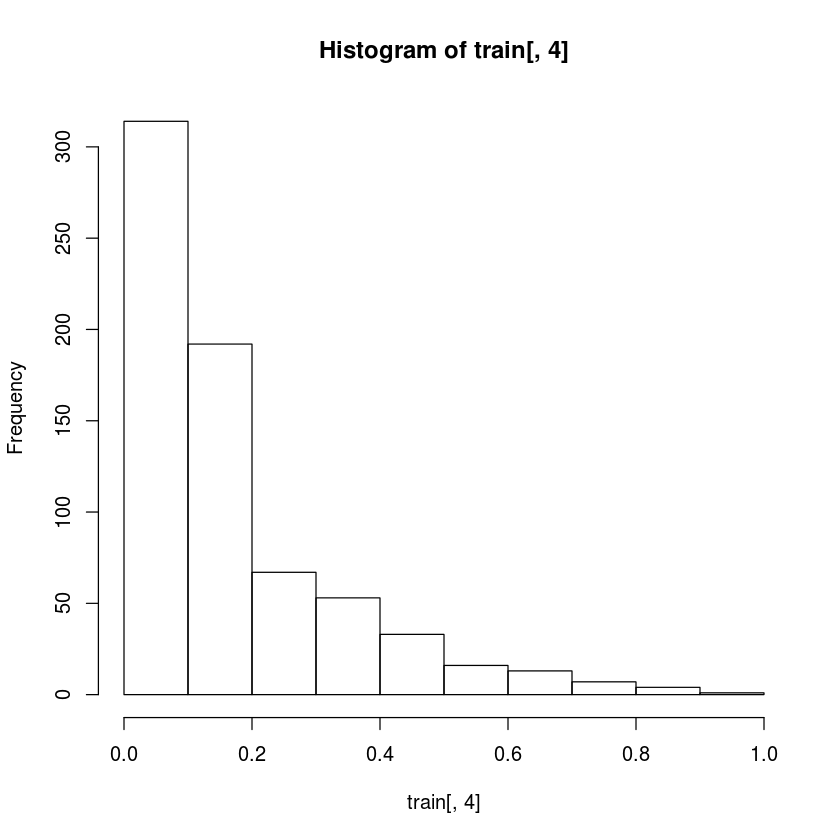

In [6]:
#进行基于秩分析的正态分布转换
hist(train[,4])


In [7]:
summary(data)


       x1              x2             x3              x4        
 Min.   :1.000   Min.   : 4.0   Min.   :0.000   Min.   :  2.00  
 1st Qu.:1.000   1st Qu.:12.0   1st Qu.:2.000   1st Qu.: 14.00  
 Median :2.000   Median :18.0   Median :2.000   Median : 23.00  
 Mean   :2.577   Mean   :20.9   Mean   :2.545   Mean   : 32.71  
 3rd Qu.:4.000   3rd Qu.:24.0   3rd Qu.:4.000   3rd Qu.: 40.00  
 Max.   :4.000   Max.   :72.0   Max.   :4.000   Max.   :184.00  
       x5              x6              x7              x8       
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:3.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :1.000   Median :3.000   Median :3.000   Median :3.000  
 Mean   :2.105   Mean   :3.384   Mean   :2.682   Mean   :2.845  
 3rd Qu.:3.000   3rd Qu.:5.000   3rd Qu.:3.000   3rd Qu.:4.000  
 Max.   :5.000   Max.   :5.000   Max.   :4.000   Max.   :4.000  
       x9             x10             x11             x12       
 Min.   :1.000   Min.   :

Loading required package: MASS
Loading required package: GenABEL.data


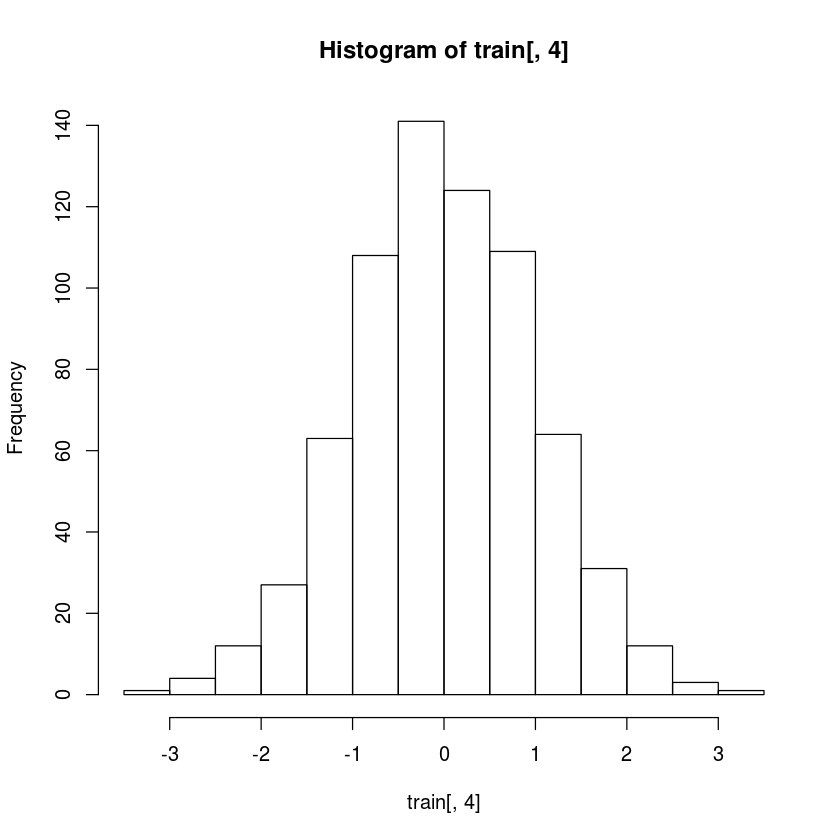

In [9]:
library(GenABEL)
train[,c(2,4,10)]<-apply(train[,c(2,4,10)],2, rntransform)
test[,c(2,4,10)]<- apply(test[,c(2,4,10)],2, rntransform)
hist(train[,4])

In [10]:
summary(train)

       x1               x2                  x3               x4           
 Min.   :0.0000   Min.   :-2.763741   Min.   :0.0000   Min.   :-3.188815  
 1st Qu.:0.0000   1st Qu.:-0.602047   1st Qu.:0.5000   1st Qu.:-0.731808  
 Median :0.3333   Median :-0.012533   Median :0.5000   Median :-0.008952  
 Mean   :0.5400   Mean   : 0.002879   Mean   :0.6264   Mean   : 0.000681  
 3rd Qu.:1.0000   3rd Qu.: 0.449797   3rd Qu.:1.0000   3rd Qu.: 0.678992  
 Max.   :1.0000   Max.   : 3.188815   Max.   :1.0000   Max.   : 3.188815  
       x5               x6               x7               x8        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.5000   1st Qu.:0.3333   1st Qu.:0.3333  
 Median :0.0000   Median :0.5000   Median :0.6667   Median :0.6667  
 Mean   :0.2886   Mean   :0.5925   Mean   :0.5490   Mean   :0.6133  
 3rd Qu.:0.5000   3rd Qu.:0.7500   3rd Qu.:0.6667   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1

In [11]:
#------------------------使用SNNS包实现RBF神经网络--------------------------
#R语言中已经有许多用于神经网络的package。例如nnet、AMORE以及neuralnet，
#nnet提供了最常见的前馈反向传播神经网络算法。
#AMORE包则更进一步提供了更为丰富的控制参数，并可以增加多个隐藏层。
#neuralnet包的改进在于提供了弹性反向传播算法和更多的激活函数形式。
#但以上各包均围绕着BP网络，并未涉及到神经网络中的其它拓扑结构和网络模型。
#而新出炉的RSNNS包则在这方面有了极大的扩充。

#Stuttgart Neural Network Simulator（SNNS）是德国斯图加特大学开发的优秀神经网络仿真软件，
#为国外的神经网络研究者所广泛采用。其手册内容极为丰富，同时支持友好的 Linux 平台。
#而RSNNS则是连接R和SNNS的工具，在R中即可直接调用SNNS的函数命令。。

#载入程序和数据 
library("RSNNS") 
x<-train[,1:24]
y<-train[,25]

Loading required package: Rcpp


In [12]:
#主要参数说明：
#initFunc中的“RBF_Weights”为广义RBF，随机选择size个样本作为中心点
#size应该是根据数据实验出来的，但是一般情况下，50-200足够了。点越多，计算量增大的同时，会出现过度拟合
#initFuncParams的前两个参数当Y为二分类时设置为-4和4，否则为0,1
#initFuncParams的第三个参数为惩罚项，数值越大，过度拟合情况越不严重
#initFuncParams的第四个参数为激活范围参数，对应说明文档P175中的P参数，Matlab中newrb中的spread参数，值越小，泛化能力越差。
model <- rbf(x, y, size=150, maxit=300,linOut=F,
             initFunc = "RBF_Weights",
             initFuncParams=c(-4, 4, 10, 0.5, 0),
             learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8))

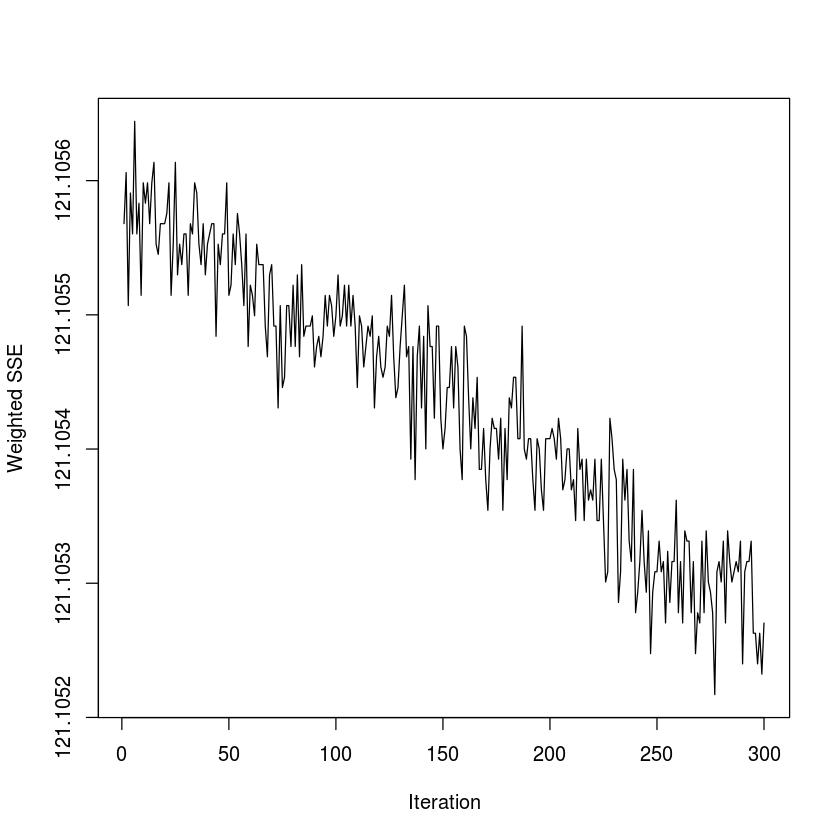

In [14]:
#调优经验：
####使得训练ROC和测试ROC接近，并且测试ROC最高，是调优的目标
#1、先设置initFuncParams=c(-4, 4, 0, 1, 0)，调整size以获取较高的训
#   练集ROC，根据实际样本量确定size大小，比如样本为100，size范围为
#   5-20,样本为500，size范围50-300。
#   本例中测试了40、70、100、150，150时比较理想
#2、调整initFuncParams的第4个参数，从1往下调整，最小值为0.
#   以获取较高的训练集ROC。
#   本例中测试了1、0.8、0.5、0.1，0.5时比较理想
#3、调整initFuncParams的第3个参数,从0逐渐增大，无上限。以获取较高的验证集ROC。
#   调整的过程中，训练集ROC会下降。
#   本例中测试了0、1、5、10、20，10时比较理想
#4、以上方法只能找到较好的效果，但无法找到最优点，比如沿用刚才的方法，
#   得到的为initFuncParams=c(-4, 4, 20, 0.5, 0)
#   而实际情况是initFuncParams=c(-4, 4, 20, 0.1, 0)更理想。
plotIterativeError(model)

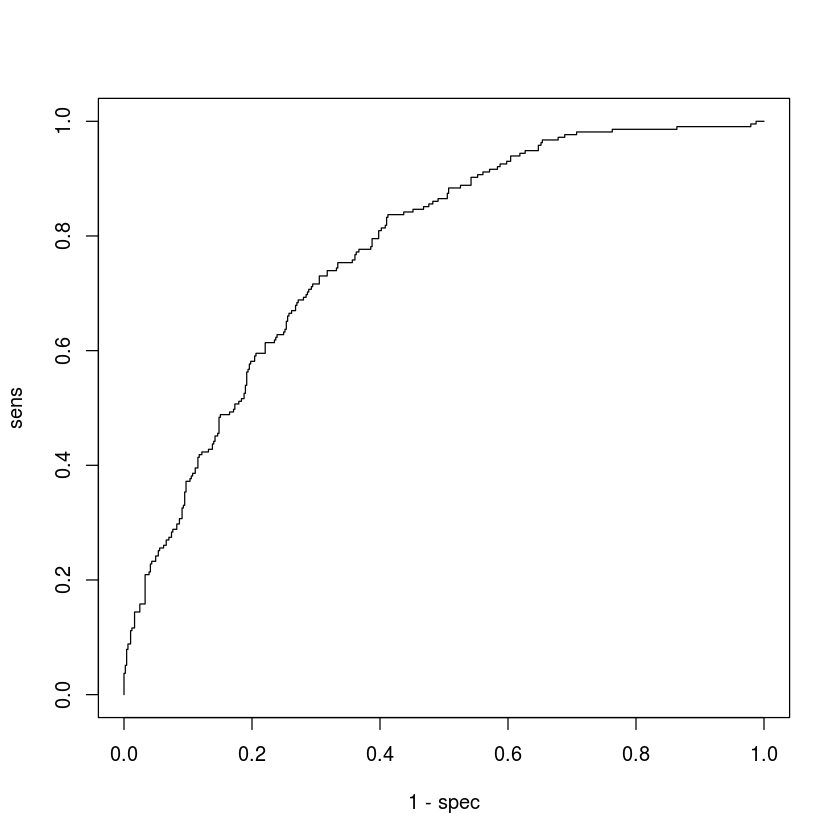

In [16]:
#使用训练集做预测并绘制ROC曲线
train_pred<-predict(model, train[,1:24])
plotROC(T=train_pred, D=train[,25])

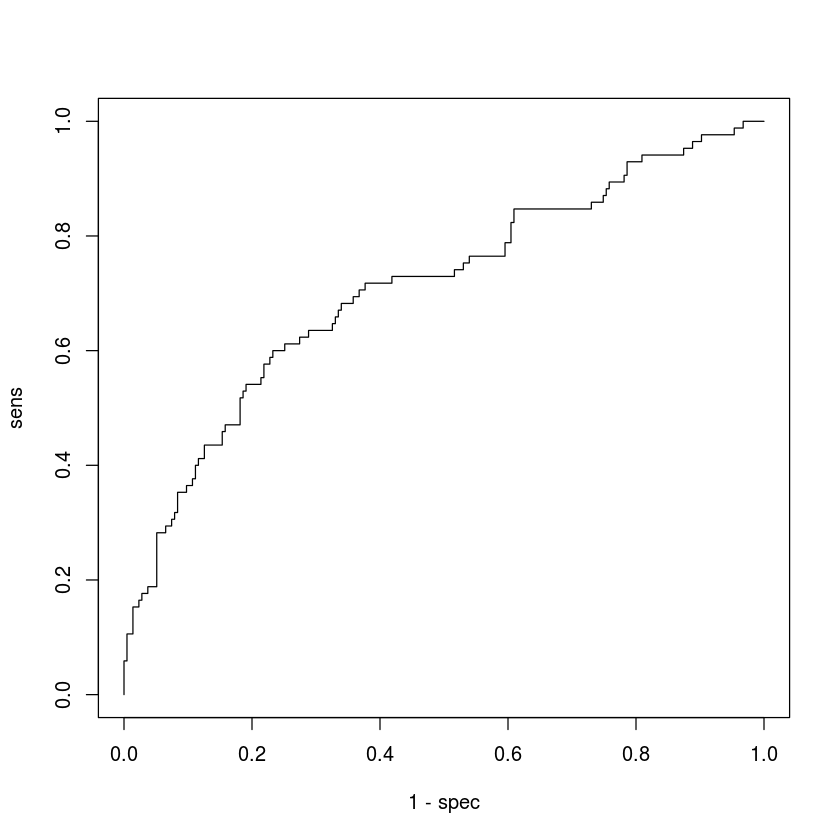

In [18]:
#使用测试集做预测并绘制ROC曲线
test_pred<-predict(model, test[,1:24])
plotROC(T=test_pred, D=test[,25])

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



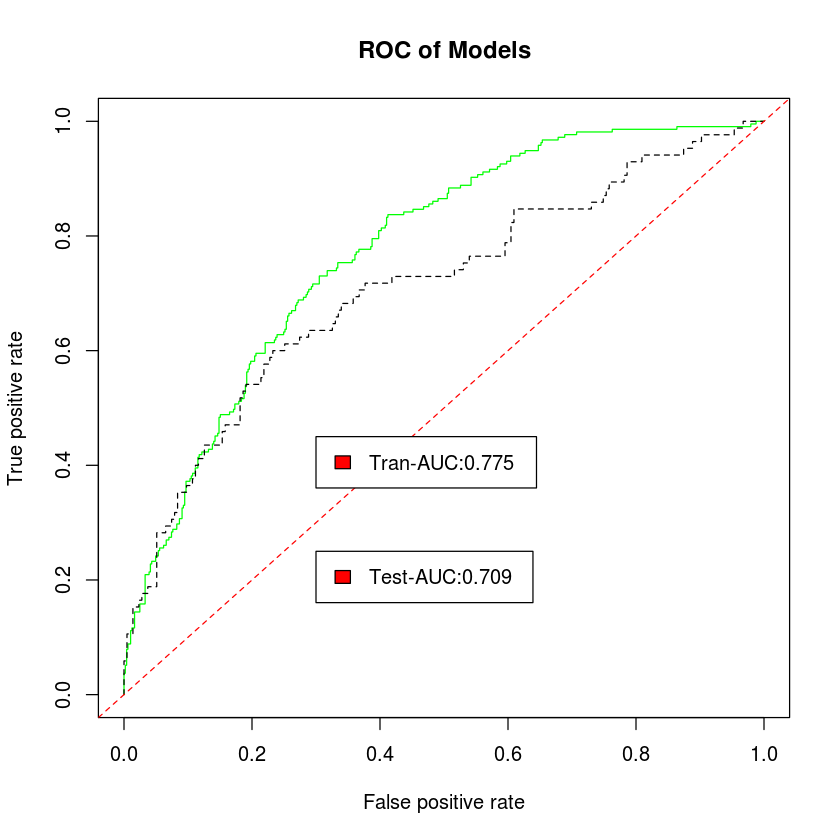

In [19]:
#ROC对照
ROC() 